## SQL Database for Tree Data

### Import Dependencies

In [13]:
import os
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import text

In [16]:
# Define the destination folder and database path
destination_folder = 'data'
database_filename = 'deforestation_data.sqlite'
destination_path = os.path.join(destination_folder, database_filename)

# Create an SQLite engine
engine = create_engine(f'sqlite:///{destination_path}')

In [17]:
# Load CSVs into DataFrames
deforestation = pd.read_csv('data/deforestation_raw.csv', low_memory = False)

# Check the DataFrame
print(deforestation.head())

       country  threshold      area  extent_2000  extent_2010  gain_2000-2020  \
0  Afghanistan          0  64385715     64385715     64385715           10741   
1  Afghanistan         10  64385715       432115       126247           10741   
2  Afghanistan         15  64385715       302660       106867           10741   
3  Afghanistan         20  64385715       284357       105733           10741   
4  Afghanistan         25  64385715       254867        72395           10741   

   loss_2001  loss_2002  loss_2003  loss_2004  ...  emissions_2019  \
0        103        214        267        225  ...             NaN   
1         92        190        253        207  ...             NaN   
2         91        186        247        205  ...             NaN   
3         89        180        245        203  ...             NaN   
4         89        180        245        202  ...             NaN   

   emissions_2020  emissions_2021  emissions_2022  emissions_2023  \
0             NaN      

In [18]:
# Load DataFrame
deforestation.to_sql('deforestation', con=engine, if_exists='replace', index=False)

# Verify tables
deforestation_from_db = pd.read_sql('SELECT * FROM deforestation', con=engine)


# Check the data loaded
print(deforestation_from_db.head())

       country  threshold      area  extent_2000  extent_2010  gain_2000-2020  \
0  Afghanistan          0  64385715     64385715     64385715           10741   
1  Afghanistan         10  64385715       432115       126247           10741   
2  Afghanistan         15  64385715       302660       106867           10741   
3  Afghanistan         20  64385715       284357       105733           10741   
4  Afghanistan         25  64385715       254867        72395           10741   

   loss_2001  loss_2002  loss_2003  loss_2004  ...  emissions_2019  \
0        103        214        267        225  ...             NaN   
1         92        190        253        207  ...             NaN   
2         91        186        247        205  ...             NaN   
3         89        180        245        203  ...             NaN   
4         89        180        245        202  ...             NaN   

   emissions_2020  emissions_2021  emissions_2022  emissions_2023  \
0             NaN      

In [19]:
# Check missing values
# Percentage of missing values
missing_percentage = deforestation.isnull().sum() * 100 / len(deforestation)
print(missing_percentage)
print()
missing_values = deforestation.isnull().sum()
print(missing_values)

country                        0.000000
threshold                      0.000000
area                           0.000000
extent_2000                    0.000000
extent_2010                    0.000000
                                ...    
subnational1                   6.316916
iso                           84.706237
loss__year                    84.706237
tree_cover_loss               84.706237
tree_cover_loss_from_fires    84.706237
Length: 63, dtype: float64

country                           0
threshold                         0
area                              0
extent_2000                       0
extent_2010                       0
                              ...  
subnational1                   1888
iso                           25317
loss__year                    25317
tree_cover_loss               25317
tree_cover_loss_from_fires    25317
Length: 63, dtype: int64


In [20]:
# Sort from most to least
missing_values_sorted = missing_percentage.sort_values(ascending=False)

# Display the sorted list of missing values
print(missing_values_sorted.head(50))

tree_cover_loss_from_fires    84.706237
tree_cover_loss               84.706237
loss__year                    84.706237
iso                           84.706237
emissions_2005                62.500000
emissions_2010                62.500000
emissions_2009                62.500000
emissions_2008                62.500000
emissions_2007                62.500000
emissions_2006                62.500000
emissions_2003                62.500000
emissions_2004                62.500000
emissions_2012                62.500000
emissions_2002                62.500000
emissions_2001                62.500000
net_flux_yr                   62.500000
emissions_2011                62.500000
emissions_2014                62.500000
emissions_2013                62.500000
carbon_emissions_yr           62.500000
emissions_2015                62.500000
emissions_2016                62.500000
emissions_2017                62.500000
emissions_2018                62.500000
emissions_2019                62.500000


In [21]:
deforestation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29888 entries, 0 to 29887
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     29888 non-null  object 
 1   threshold                   29888 non-null  int64  
 2   area                        29888 non-null  int64  
 3   extent_2000                 29888 non-null  int64  
 4   extent_2010                 29888 non-null  int64  
 5   gain_2000-2020              29888 non-null  int64  
 6   loss_2001                   29888 non-null  int64  
 7   loss_2002                   29888 non-null  int64  
 8   loss_2003                   29888 non-null  int64  
 9   loss_2004                   29888 non-null  int64  
 10  loss_2005                   29888 non-null  int64  
 11  loss_2006                   29888 non-null  int64  
 12  loss_2007                   29888 non-null  int64  
 13  loss_2008                   298

In [22]:
deforestation.describe()

,threshold,area,extent_2000,extent_2010,gain_2000-2020,loss_2001,loss_2002,loss_2003,loss_2004,loss_2005,...,emissions_2017,emissions_2018,emissions_2019,emissions_2020,emissions_2021,emissions_2022,emissions_2023,loss__year,tree_cover_loss,tree_cover_loss_from_fires
count,29888.000000,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,...,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,4571.000000,4.571000e+03,4.571000e+03
mean,28.125000,7.095997e+06,2.725051e+06,2.685809e+06,7.005051e+04,7.034324e+03,8.577101e+03,7.540283e+03,1.034466e+04,9.502744e+03,...,6.060456e+06,5.023387e+06,4.813313e+06,4.950016e+06,4.960194e+06,4.870291e+06,5.958930e+06,2011.850361,1.066996e+05,3.022008e+04
std,22.491694,4.717176e+07,2.410581e+07,2.388483e+07,7.670669e+05,7.134465e+04,9.640049e+04,8.793128e+04,1.133960e+05,9.755882e+04,...,5.578451e+07,4.420133e+07,3.984519e+07,4.273659e+07,4.460947e+07,4.571422e+07,6.357170e+07,6.624496,4.496165e+05,2.581936e+05
min,0.000000,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00
25%,13.750000,1.238338e+05,4.912500e+03,4.558750e+03,2.077500e+02,4.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,...,2.590000e+02,1.892500e+02,1.620000e+02,2.330000e+02,3.887500e+02,3.810000e+02,6.837500e+02,2006.000000,7.765850e+01,1.625515e+00
50%,22.500000,6.197910e+05,1.052395e+05,1.028950e+05,2.491000e+03,1.070000e+02,8.600000e+01,6.900000e+01,1.220000e+02,1.100000e+02,...,6.389700e+04,4.197350e+04,3.833000e+04,4.248900e+04,4.756400e+04,4.480150e+04,6.244400e+04,2012.000000,3.468760e+03,7.392309e+01
75%,35.000000,2.915070e+06,6.886515e+05,6.689635e+05,1.657675e+04,1.071000e+03,1.015250e+03,7.780000e+02,1.202250e+03,1.234250e+03,...,9.582792e+05,7.323638e+05,7.070942e+05,7.441522e+05,7.592595e+05,7.477075e+05,8.506665e+05,2018.000000,4.042546e+04,9.462224e+02
max,75.000000,1.689455e+09,1.689455e+09,1.689455e+09,3.722054e+07,2.933280e+06,3.716128e+06,3.489399e+06,4.133894e+06,3.676303e+06,...,2.633356e+09,1.814375e+09,1.610957e+09,1.903415e+09,1.985685e+09,2.202634e+09,3.736248e+09,2023.000000,8.570168e+06,7.757410e+06


## Tree Loss and Gain Database

In [27]:
# Define the destination folder and database path
destination_folder = 'data'
database_filename = 'tree_data.sqlite'
destination_path = os.path.join(destination_folder, database_filename)

# Create an SQLite engine
engine = create_engine(f'sqlite:///{destination_path}')

In [34]:
# Load CSVs into DataFrames
tree_loss = pd.read_csv('data/tree_loss_clean.csv', low_memory = False)

# Check the DataFrame
print(tree_loss.head())

             country_old  threshold      area  extent_2000  extent_2010  \
0            Afghanistan         30  64385715       205791        71797   
1            Afghanistan         50  64385715       148430        46242   
2            Afghanistan         75  64385715        75486        18270   
3  Akrotiri and Dhekelia         30     23448          456          383   
4  Akrotiri and Dhekelia         50     23448          336          238   

   gain_2000-2020  2001  2002  2003  2004  ...  2015  2016  2017  2018  2019  \
0           10741    88   179   244   201  ...     0     0     0    26    17   
1           10741    78   135   200   159  ...     0     0     0    19    15   
2           10741    47    61    96    61  ...     0     0     0    10     8   
3              42     2     1     0     2  ...     5     9     1     1     1   
4              42     1     1     0     2  ...     5     9     1     1     1   

   2020  2021  2022  2023      country  
0    37    26     6    15  

In [35]:
# Load DataFrame
tree_loss.to_sql('tree_loss', con=engine, if_exists='replace', index=False)

# Verify tables
tree_loss_from_db = pd.read_sql('SELECT * FROM tree_loss', con=engine)


# Check the data loaded
print(tree_loss_from_db.head())

             country_old  threshold      area  extent_2000  extent_2010  \
0            Afghanistan         30  64385715       205791        71797   
1            Afghanistan         50  64385715       148430        46242   
2            Afghanistan         75  64385715        75486        18270   
3  Akrotiri and Dhekelia         30     23448          456          383   
4  Akrotiri and Dhekelia         50     23448          336          238   

   gain_2000-2020  2001  2002  2003  2004  ...  2015  2016  2017  2018  2019  \
0           10741    88   179   244   201  ...     0     0     0    26    17   
1           10741    78   135   200   159  ...     0     0     0    19    15   
2           10741    47    61    96    61  ...     0     0     0    10     8   
3              42     2     1     0     2  ...     5     9     1     1     1   
4              42     1     1     0     2  ...     5     9     1     1     1   

   2020  2021  2022  2023      country  
0    37    26     6    15  

In [31]:
# Load CSVs into DataFrames
tree_gain = pd.read_csv('data/tree_gain_clean.csv', low_memory = False)

# Check the DataFrame
print(tree_gain.head())

         country  iso  tree_cover_gain_1000_ha  umd_tree_cover_extent_2000__ha
0          Aruba  ABW                 0.019240                    1.819751e+04
1    Afghanistan  AFG                10.741024                    6.438572e+07
2         Angola  AGO              1224.126467                    1.247423e+08
3       Anguilla  AIA                 0.069881                    8.332248e+03
4  Aland Islands  ALA                 2.582831                    1.506433e+05


In [38]:
# Load DataFrame
tree_gain.to_sql('tree_gain', con=engine, if_exists='replace', index=False)

# Verify tables
tree_gain_from_db = pd.read_sql('SELECT * FROM tree_gain', con=engine)


# Check the data loaded
print(tree_gain_from_db.head())

             country_old  threshold      area  extent_2000  extent_2010  \
0            Afghanistan         30  64385715       205791        71797   
1            Afghanistan         50  64385715       148430        46242   
2            Afghanistan         75  64385715        75486        18270   
3  Akrotiri and Dhekelia         30     23448          456          383   
4  Akrotiri and Dhekelia         50     23448          336          238   

   gain_2000-2020  2001  2002  2003  2004  ...  2016  2017  2018  2019  2020  \
0           10741    88   179   244   201  ...     0     0    26    17    37   
1           10741    78   135   200   159  ...     0     0    19    15    33   
2           10741    47    61    96    61  ...     0     0    10     8    19   
3              42     2     1     0     2  ...     9     1     1     1     1   
4              42     1     1     0     2  ...     9     1     1     1     0   

   2021  2022  2023      country  total_tree_loss  
0    26     6   

In [40]:
# Assuming tree_loss is your DataFrame and the columns for losses are named as the years
years = [str(year) for year in range(2001, 2022)]  # Create a list of year strings

# Create a new column that sums the loss from 2001 to 2021
tree_loss['total_tree_loss'] = tree_loss[years].sum(axis=1)

# Display the updated DataFrame
print(tree_loss.head())

             country_old  threshold      area  extent_2000  extent_2010  \
0            Afghanistan         30  64385715       205791        71797   
1            Afghanistan         50  64385715       148430        46242   
2            Afghanistan         75  64385715        75486        18270   
3  Akrotiri and Dhekelia         30     23448          456          383   
4  Akrotiri and Dhekelia         50     23448          336          238   

   gain_2000-2020  2001  2002  2003  2004  ...  2016  2017  2018  2019  2020  \
0           10741    88   179   244   201  ...     0     0    26    17    37   
1           10741    78   135   200   159  ...     0     0    19    15    33   
2           10741    47    61    96    61  ...     0     0    10     8    19   
3              42     2     1     0     2  ...     9     1     1     1     1   
4              42     1     1     0     2  ...     9     1     1     1     0   

   2021  2022  2023      country  total_tree_loss  
0    26     6   

In [49]:
# Create a new column for net change
tree_loss['net_tree_change'] = tree_loss['gain_2000-2020'] - tree_loss['total_tree_loss']

# Display the updated DataFrame
print(tree_loss.head())
tree_loss.describe()

             country_old  threshold      area  extent_2000  extent_2010  \
0            Afghanistan         30  64385715       205791        71797   
1            Afghanistan         50  64385715       148430        46242   
2            Afghanistan         75  64385715        75486        18270   
3  Akrotiri and Dhekelia         30     23448          456          383   
4  Akrotiri and Dhekelia         50     23448          336          238   

   gain_2000-2020  2001  2002  2003  2004  ...  2017  2018  2019  2020  2021  \
0           10741    88   179   244   201  ...     0    26    17    37    26   
1           10741    78   135   200   159  ...     0    19    15    33    23   
2           10741    47    61    96    61  ...     0    10     8    19     9   
3              42     2     1     0     2  ...     1     1     1     1     1   
4              42     1     1     0     2  ...     1     1     1     0     1   

   2022  2023      country  total_tree_loss  net_tree_change  
0    

,threshold,area,extent_2000,extent_2010,gain_2000-2020,2001,2002,2003,2004,2005,...,2016,2017,2018,2019,2020,2021,2022,2023,total_tree_loss,net_tree_change
count,11208.000000,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,...,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04
mean,51.666667,7.095997e+06,1.722802e+06,1.671353e+06,7.005051e+04,6.158516e+03,7.401698e+03,6.414623e+03,9.063567e+03,8.426631e+03,...,1.313337e+04,1.276840e+04,1.063028e+04,1.045519e+04,1.101093e+04,1.046707e+04,9.761705e+03,1.174177e+04,1.936718e+05,-1.236213e+05
std,18.409756,4.717308e+07,1.573470e+07,1.540655e+07,7.670883e+05,6.403303e+04,8.412326e+04,7.610497e+04,1.004859e+05,8.907173e+04,...,1.288906e+05,1.211441e+05,1.036406e+05,8.966041e+04,1.057809e+05,1.163084e+05,9.609341e+04,1.365862e+05,1.820485e+06,1.256379e+06
min,30.000000,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.475526e+07
25%,30.000000,1.238338e+05,1.543000e+03,1.292000e+03,2.077500e+02,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,-1.219550e+04
50%,50.000000,6.197910e+05,4.740650e+04,4.411750e+04,2.491000e+03,7.700000e+01,6.000000e+01,4.750000e+01,8.400000e+01,7.300000e+01,...,8.600000e+01,1.240000e+02,8.300000e+01,7.600000e+01,8.300000e+01,7.250000e+01,6.800000e+01,9.500000e+01,2.428000e+03,-4.650000e+01
75%,75.000000,2.915070e+06,3.851010e+05,3.630585e+05,1.657675e+04,8.820000e+02,8.122500e+02,6.140000e+02,9.660000e+02,1.009250e+03,...,1.722250e+03,1.997000e+03,1.534000e+03,1.494250e+03,1.518250e+03,1.400500e+03,1.329000e+03,1.498250e+03,2.997750e+04,5.992500e+02
max,75.000000,1.689455e+09,7.612265e+08,7.547721e+08,3.722054e+07,2.746362e+06,3.507049e+06,3.248527e+06,3.848771e+06,3.486563e+06,...,5.378844e+06,5.288941e+06,5.560431e+06,3.686557e+06,5.442086e+06,6.518852e+06,4.287817e+06,8.570168e+06,7.600841e+07,5.687811e+06


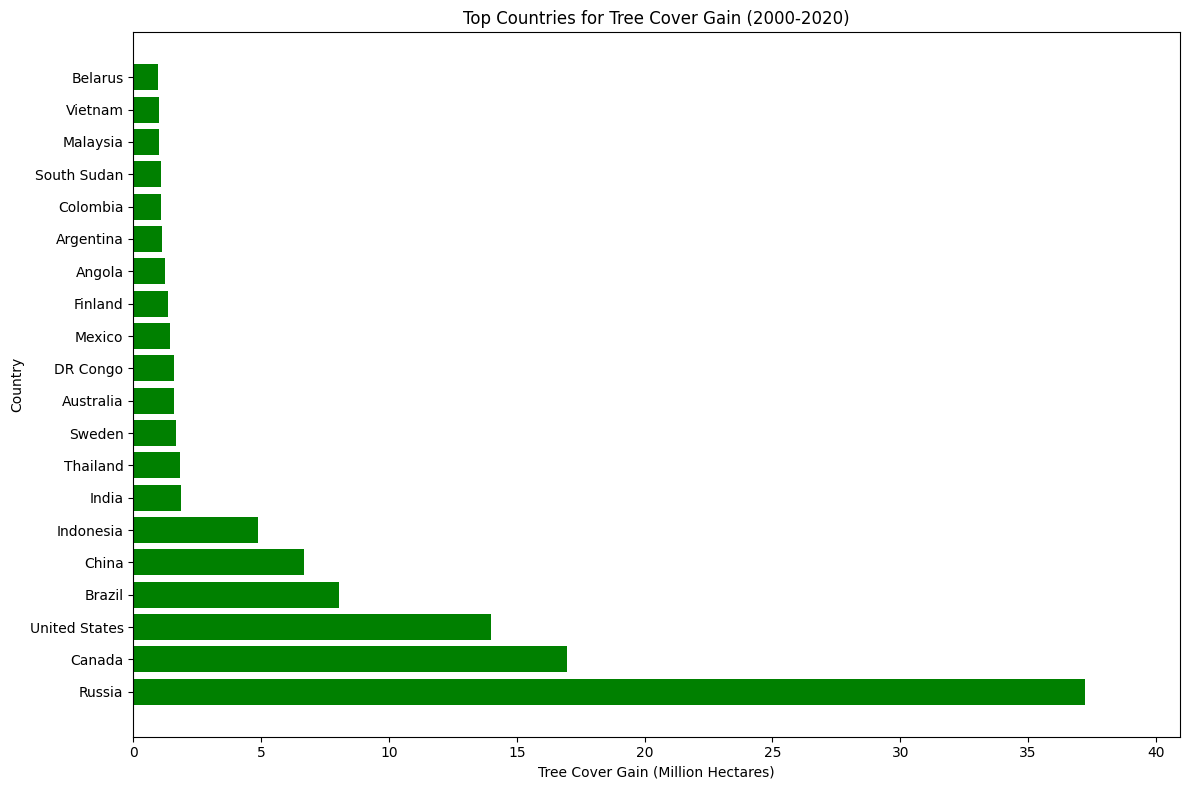

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tree_gain_from_db' contains the data with 'countries' and 'tree_cover_gain_1000_ha' columns

# Filter out rows where 'tree_cover_gain_1000_ha' is NaN or zero
tree_gain_filtered = tree_gain_from_db[tree_gain_from_db['tree_cover_gain_1000_ha'].notna() & (tree_gain_from_db['tree_cover_gain_1000_ha'] > 0)]

# Sort the data by tree cover gain and select the top 20 countries
top_countries = tree_gain_filtered[['country', 'tree_cover_gain_1000_ha']].sort_values(by='tree_cover_gain_1000_ha', ascending=False).head(20)

# Convert tree cover gain to billion hectares (1,000 hectares = 0.01 billion hectares)
top_countries['tree_cover_gain_billion_ha'] = top_countries['tree_cover_gain_1000_ha'] / 1000

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_countries['country'], top_countries['tree_cover_gain_billion_ha'], color='green')
plt.title('Top Countries for Tree Cover Gain (2000-2020)')
plt.xlabel('Tree Cover Gain (Million Hectares)')
plt.ylabel('Country')
plt.xlim(0, top_countries['tree_cover_gain_billion_ha'].max() * 1.1)  # Add some space on the right
plt.tight_layout()
plt.show()